testing to see if we can view the preprocessed image nicely


Preprocessed shape: (375, 360, 360)
Preprocessed spacing: (1.0, 1.0, 1.0)
Image intensity range: 0.0 to 1.0
Mask values: [0 1 2]


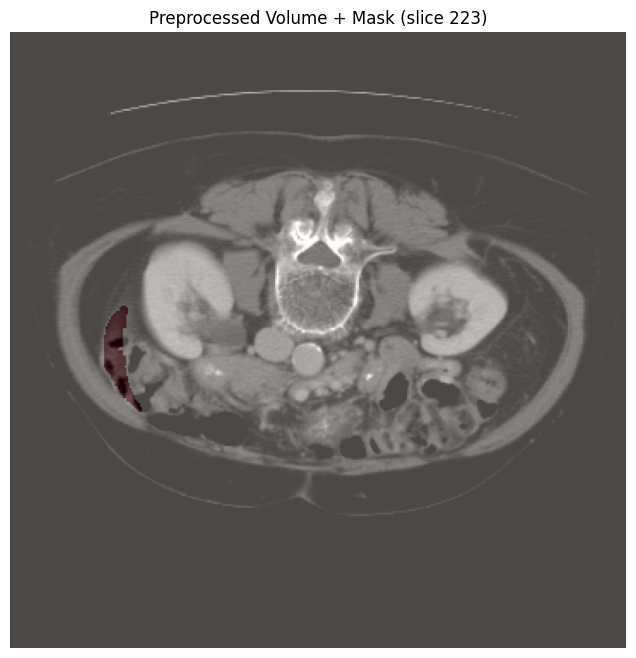

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Paths to preprocessed files
image_path = "../data/preprocessed/volume-0.nii"
mask_path = "../data/preprocessed_masks/segmentation-0.nii"

# Load preprocessed image and mask
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Preprocessed shape:", img_arr.shape)
print("Preprocessed spacing:", img.GetSpacing())
print("Image intensity range:", img_arr.min(), "to", img_arr.max())
print("Mask values:", np.unique(mask_arr))

# Find first labeled slice
for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        slice_index = i
        break

# Display overlay
plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


image is coming up nicely, but it says that we have 3 different mask values, but only 2 colors, the code only colors red non zero values, so its time to change it

Preprocessed shape: (375, 360, 360)
Preprocessed spacing: (1.0, 1.0, 1.0)
Image intensity range: 0.0 to 1.0
Mask values: [0 1 2]


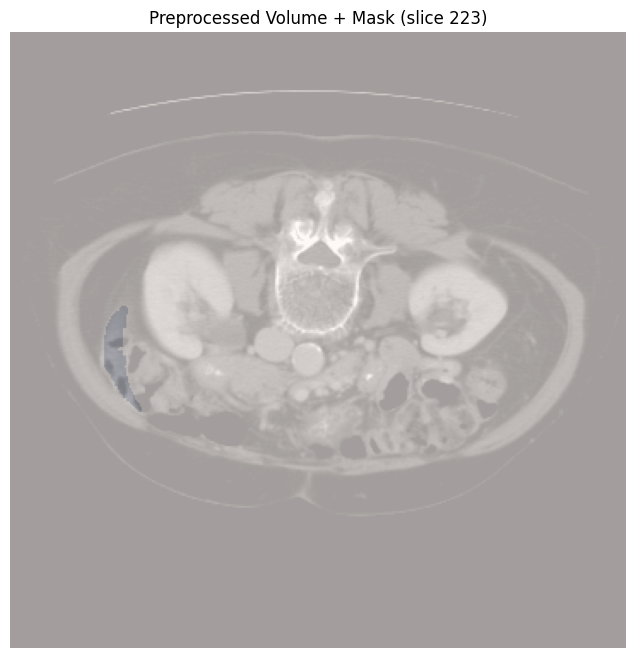

In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Paths to preprocessed files
image_path = "../data/preprocessed/volume-0.nii"
mask_path = "../data/preprocessed_masks/segmentation-0.nii"

# Load preprocessed image and mask
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Preprocessed shape:", img_arr.shape)
print("Preprocessed spacing:", img.GetSpacing())
print("Image intensity range:", img_arr.min(), "to", img_arr.max())
print("Mask values:", np.unique(mask_arr))

# Find first labeled slice
for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        slice_index = i
        break

# Display overlay
'''plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()'''

liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)  # Liver in blue
plt.imshow(tumor_mask, cmap='Reds', alpha=0.5)   # Tumor in red
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


tumor should be visible though, since mask value of 2 is present, use stronger color

Preprocessed shape: (375, 360, 360)
Preprocessed spacing: (1.0, 1.0, 1.0)
Image intensity range: 0.0 to 1.0
Mask values: [0 1 2]


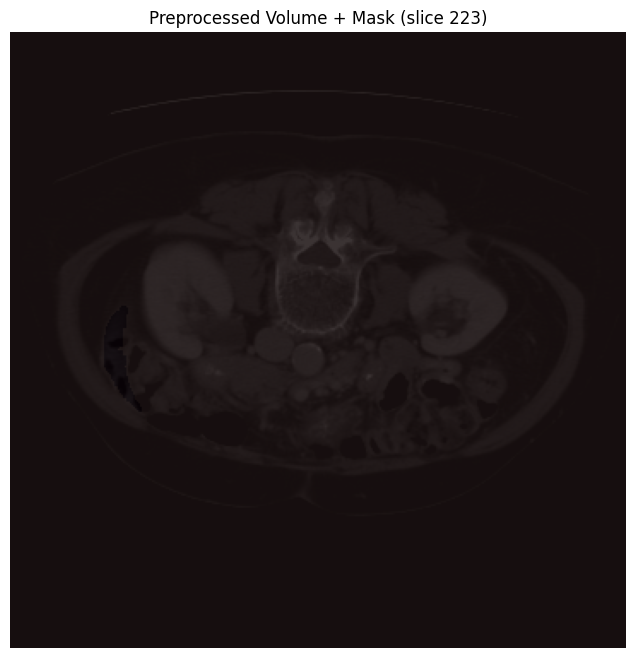

In [3]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Paths to preprocessed files
image_path = "../data/preprocessed/volume-0.nii"
mask_path = "../data/preprocessed_masks/segmentation-0.nii"

# Load preprocessed image and mask
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Preprocessed shape:", img_arr.shape)
print("Preprocessed spacing:", img.GetSpacing())
print("Image intensity range:", img_arr.min(), "to", img_arr.max())
print("Mask values:", np.unique(mask_arr))

# Find first labeled slice
for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        slice_index = i
        break

# Display overlay
'''plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()

liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)  # Liver in blue
plt.imshow(tumor_mask, cmap='Reds', alpha=0.5)   # Tumor in red
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()
'''

liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)   # Liver (transparent blue)
plt.imshow(tumor_mask, cmap='hot', alpha=0.8)      # Tumor (high-contrast red/orange)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


getting worse..

Preprocessed shape: (375, 360, 360)
Preprocessed spacing: (1.0, 1.0, 1.0)
Image intensity range: 0.0 to 1.0
Mask values: [0 1 2]
Tumor pixel count: 0


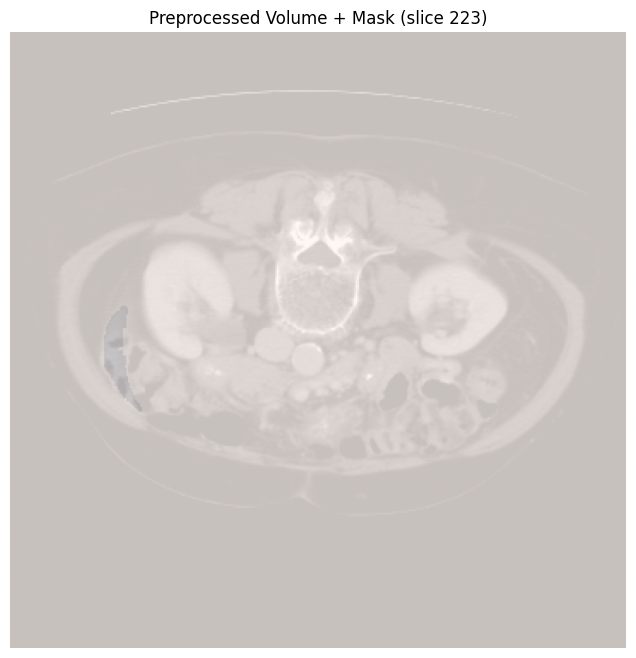

In [5]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Paths to preprocessed files
image_path = "../data/preprocessed/volume-0.nii"
mask_path = "../data/preprocessed_masks/segmentation-0.nii"

# Load preprocessed image and mask
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Preprocessed shape:", img_arr.shape)
print("Preprocessed spacing:", img.GetSpacing())
print("Image intensity range:", img_arr.min(), "to", img_arr.max())
print("Mask values:", np.unique(mask_arr))

# Find first labeled slice
for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        slice_index = i
        break

# Display overlay
'''plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()

liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)  # Liver in blue
plt.imshow(tumor_mask, cmap='Reds', alpha=0.5)   # Tumor in red
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)   # Liver (transparent blue)
plt.imshow(tumor_mask, cmap='hot', alpha=0.8)      # Tumor (high-contrast red/orange)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()
'''

liver_mask = (mask_arr[slice_index] == 1)
tumor_mask = (mask_arr[slice_index] == 2)

print("Tumor pixel count:", np.sum(tumor_mask))


plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')  # Base CT stays grayscale
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)  # Light blue for liver
plt.imshow(tumor_mask, cmap='Reds', alpha=0.7)   # Strong red for tumor
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


Used np.isclose() to safely detect label values in float masks
Automatically find first slice with tumor (label 2)
Print tumor/liver pixel counts for debugging
Adjusted alpha for better overlay visibility

Preprocessed shape: (375, 360, 360)
Preprocessed spacing: (1.0, 1.0, 1.0)
Image intensity range: 0.0 to 1.0
Mask values (entire volume): [0 1 2]

Showing slice 228
Unique mask values in this slice: [0 1 2]
Tumor pixel count: 21
Liver pixel count: 1116


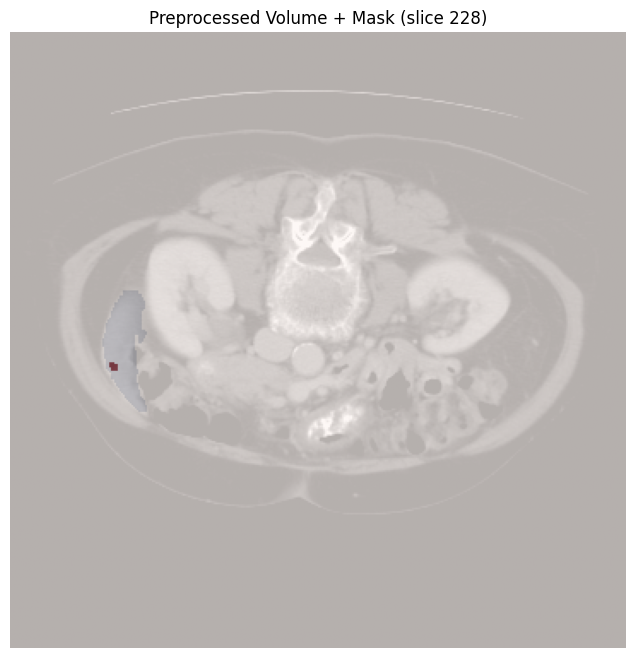

In [6]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# File paths
image_path = "../data/preprocessed/volume-0.nii"
mask_path = "../data/preprocessed_masks/segmentation-0.nii"

# Load data
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Preprocessed shape:", img_arr.shape)
print("Preprocessed spacing:", img.GetSpacing())
print("Image intensity range:", img_arr.min(), "to", img_arr.max())
print("Mask values (entire volume):", np.unique(mask_arr))

# Find first slice with tumor using float-safe comparison
slice_index = None
for i in range(mask_arr.shape[0]):
    if np.any(np.isclose(mask_arr[i], 2)):
        slice_index = i
        break

if slice_index is None:
    raise ValueError("No tumor slice found in this mask.")

# Extract masks
liver_mask = np.isclose(mask_arr[slice_index], 1)
tumor_mask = np.isclose(mask_arr[slice_index], 2)

# Debug info
print(f"\nShowing slice {slice_index}")
print("Unique mask values in this slice:", np.unique(mask_arr[slice_index]))
print("Tumor pixel count:", np.sum(tumor_mask))
print("Liver pixel count:", np.sum(liver_mask))

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(img_arr[slice_index], cmap='gray')
plt.imshow(liver_mask, cmap='Blues', alpha=0.3)
plt.imshow(tumor_mask, cmap='Reds', alpha=0.6)
plt.title(f"Preprocessed Volume + Mask (slice {slice_index})")
plt.axis('off')
plt.show()


okay tumors can be seen!